# Importing the libraries

In [1]:
import pandas as pa
import numpy as np
np.random.seed(0)
from sklearn.metrics import precision_score,recall_score,f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics  
from sklearn.metrics import classification_report

# Importing the dataset

In [3]:
data = pa.read_csv(r"drebin-215-dataset-5560malware-9476-benign.csv", low_memory=False)
print("Total missing values : ",sum(list(data.isna().sum())))
data

Total missing values :  0


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,B
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,B
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,B
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,B


In [4]:
data['class'].value_counts()

class
B    9476
S    5560
Name: count, dtype: int64

# Preprocessing the data involves encoding the class field and removing any special characters.

In [5]:
#Extract the unique values of class column and count their frequency

classes,count = np.unique(data['class'],return_counts=True)

#Perform Label Encoding to encode the classes as 0 and 1
lbl_enc = LabelEncoder()
print(lbl_enc.fit_transform(classes),classes)
#Replace the original class values with encoded class values

data = data.replace(classes,lbl_enc.fit_transform(classes))

[0 1] ['B' 'S']


In [6]:
#Replacing all the special characters with NaN values

data=data.replace('[?,S]',np.NaN,regex=True)

#Calculating and printing the total number of missing values

print("Total missing values : ",sum(list(data.isna().sum())))

#Removing all the rows with NaN values from the data

data.dropna(inplace=True)

#Converting all columns to numeric data type

for c in data.columns:
    data[c] = pa.to_numeric(data[c])

#Displaying the updated data

data

Total missing values :  5


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,0
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,0


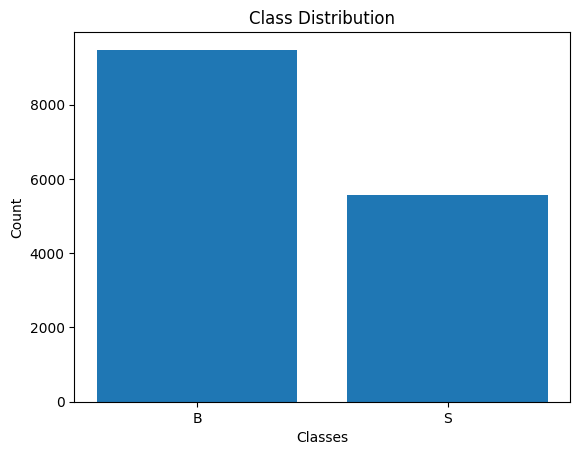

In [8]:
"""Plot a bar graph to show class distribution
'classes' variable contains unique classes in the dataset
'count' variable contains the count of each class
Set the title, x-label and y-label of the plot
Display the plot using plt.show()"""
plt.bar(classes,count)
plt.title("Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

# Assigning the training and testing data from the dataset.

In [9]:
X=data[data.columns[:len(data.columns)-1]].to_numpy()
y=data[data.columns[-1]].to_numpy()
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size = 0.2,shuffle=True)

In [10]:
print("Test Features : ",test_x.shape)
print("Test labels : ",test_y.shape)
print("Train features : ",train_x.shape)
print("Train labels : ",train_y.shape)

Test Features :  (3007, 215)
Test labels :  (3007,)
Train features :  (12024, 215)
Train labels :  (12024,)


# Using the Random Forest Classifier ML Algorithm:

In [11]:
clf = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(train_x, train_y)
  
# performing predictions on the test dataset
y_pred = clf.predict(test_x)
y_pred

array([0, 1, 0, ..., 1, 0, 0])

# The following is the performance analysis of the Random Forest Algorithm:

In [12]:
#Set the classification threshold to 0.5 for converting probabilities to classes
#Iterate through the predicted values and set to 1 if probability > 0.5, else set to 0

for i in range(len(y_pred)):
    if y_pred[i] > (1-y_pred[i]):
        y_pred[i]=1
    else:
        y_pred[i]=0

#Print the precision score of the model
print("Precision : ",precision_score(test_y,y_pred)*100)

#Print the recall score of the model
print("Recall : ",recall_score(test_y,y_pred)*100)

#Print the F1 score of the model
print("F1 Score : ",f1_score(test_y,y_pred)*100)

#Print the accuracy score of the model

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(test_y, y_pred))

Precision :  99.53139643861293
Recall :  98.60724233983287
F1 Score :  99.06716417910447
ACCURACY OF THE MODEL:  0.9933488526770868


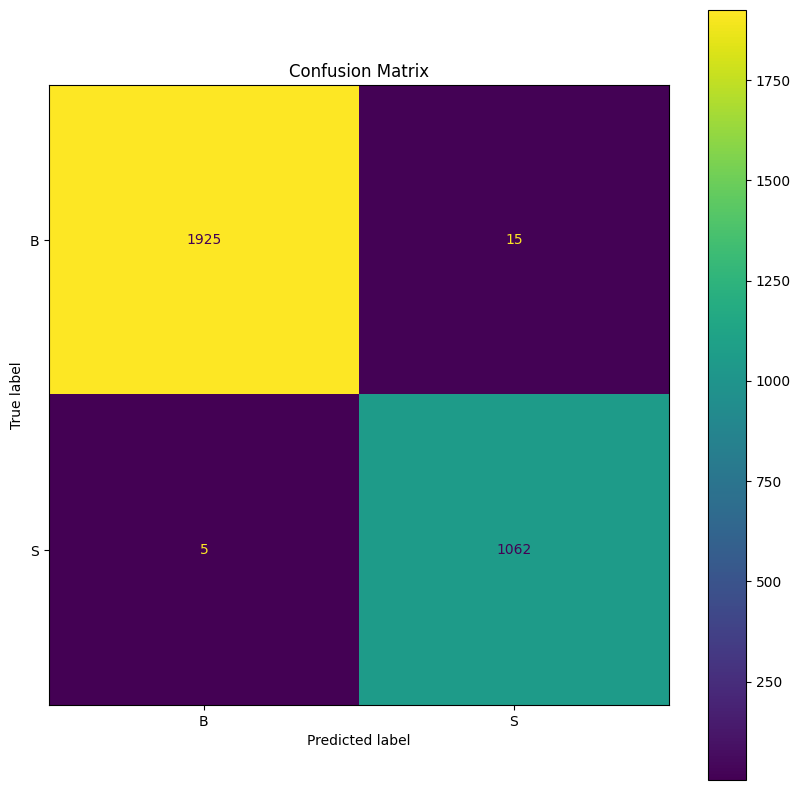

In [13]:
#Create a list of classes for the confusion matrix
classes = ["B","S"]

#Create the confusion matrix using the predicted and actual values
cm = confusion_matrix(y_pred,test_y)

#Create a ConfusionMatrixDisplay object using the confusion matrix and classes

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

#Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(10,10))

#Set the title of the plot
plt.title("Confusion Matrix")

#Plot the confusion matrix
disp = disp.plot(ax=ax)

#Display the plot
plt.show()

In [14]:
#This line of code prints out a classification report of the model's performance including precision, recall, f1-score, and support.

print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1930
           1       1.00      0.99      0.99      1077

    accuracy                           0.99      3007
   macro avg       0.99      0.99      0.99      3007
weighted avg       0.99      0.99      0.99      3007

